In [39]:
import pandas as pd
import rdkit.Chem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
import importer
from analysis_methods import AnalysisMethods
import matplotlib.pyplot as plt

In [30]:
df_assay, df_compounds = importer.import_data('./data/activity_data.csv')
df_compounds = pd.DataFrame(df_compounds)

In [31]:
#Calculate and populate df with Lipinski parameters

H_acc_list, H_don_list, MW_list, logP_list = [], [], [], []
for i in df_compounds['SMILES']:
    m = Chem.MolFromSmiles(i)
    H_acc_list.append(Descriptors.NumHAcceptors(m))
    H_don_list.append(Descriptors.NumHDonors(m))
    MW_list.append(Descriptors.ExactMolWt(m))
    logP_list.append(Descriptors.MolLogP(m))

df_compounds['H_acceptors'] = H_acc_list
df_compounds['H_donors'] = H_don_list
df_compounds['MW'] = MW_list
df_compounds['LogP'] = logP_list

df_compounds


,SMILES,H_acceptors,H_donors,MW,LogP
0,CCn1nccc1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4ccc...,5,0,485.161853,4.43530
1,Cc1cnn(C)c1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4c...,5,0,485.161853,4.26082
2,Cc1cc(C(=O)N2Cc3ccc(Cl)cc3C3(CCN(c4cncc5ccccc4...,5,0,485.161853,4.26082
3,O=C(Nc1cncc2c1CCCC2)[C@H]1CNS(=O)(=O)c2ccc(Cl)...,4,2,391.075740,2.62800
4,O=C(Nc1cncc2c1CCCC2)[C@@H]1CNS(=O)(=O)c2ccc(Cl...,4,2,391.075740,2.62800
...,...,...,...,...,...
2032,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,3,2,272.046489,3.25068
2033,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,4,3,253.096360,2.17948
2034,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,3,3,277.096360,3.07858
2035,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,3,1,287.105862,3.28768


In [32]:
#Calculate additional features for training (should probably add more, but its a start)

Heavy_atoms, Heavy_atoms_mw, NHOH, NO = [], [], [], []
Rotatable_bonds, Valence_e, rings, TPSA = [], [], [], []
for i in df_compounds['SMILES']:
    m = Chem.MolFromSmiles(i)
    Heavy_atoms.append(Descriptors.HeavyAtomCount(m))
    Heavy_atoms_mw.append(Descriptors.HeavyAtomMolWt(m))
    NHOH.append(Descriptors.NHOHCount(m))
    NO.append(Descriptors.NOCount(m))
    TPSA.append(Descriptors.TPSA(m))
    Rotatable_bonds.append(Descriptors.NumRotatableBonds(m))
    Valence_e.append(Descriptors.NumValenceElectrons(m))
    rings.append(Descriptors.RingCount(m))

df_compounds['Heavy_atoms'] = Heavy_atoms
df_compounds['Heavy_atom_mw'] = Heavy_atoms_mw
df_compounds['NHOH_count'] = NHOH
df_compounds['NO_count'] = NO
df_compounds['Rotatable_bonds'] = Rotatable_bonds
df_compounds['Valence_electonrs'] = Valence_e
df_compounds['Rings'] = rings
df_compounds['TPSA'] = TPSA

df_compounds

,SMILES,H_acceptors,H_donors,MW,LogP,Heavy_atoms,Heavy_atom_mw,NHOH_count,NO_count,Rotatable_bonds,Valence_electonrs,Rings,TPSA
0,CCn1nccc1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4ccc...,5,0,485.161853,4.43530,35,461.783,0,7,3,176,6,71.33
1,Cc1cnn(C)c1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4c...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33
2,Cc1cc(C(=O)N2Cc3ccc(Cl)cc3C3(CCN(c4cncc5ccccc4...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33
3,O=C(Nc1cncc2c1CCCC2)[C@H]1CNS(=O)(=O)c2ccc(Cl)...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16
4,O=C(Nc1cncc2c1CCCC2)[C@@H]1CNS(=O)(=O)c2ccc(Cl...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,3,2,272.046489,3.25068,19,263.623,2,5,2,94,2,77.81
2033,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,4,3,253.096360,2.17948,19,242.177,4,6,2,94,2,103.83
2034,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,3,3,277.096360,3.07858,21,266.199,3,6,2,102,3,93.60
2035,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,3,1,287.105862,3.28768,22,274.218,1,4,3,106,3,65.78


In [33]:
fingerprints = []
for i in df_compounds['SMILES']:
    m = Chem.MolFromSmiles(i)
    fingerprints.append(AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048))

df_compounds['fingerprint'] = fingerprints
df_compounds
    

,SMILES,H_acceptors,H_donors,MW,LogP,Heavy_atoms,Heavy_atom_mw,NHOH_count,NO_count,Rotatable_bonds,Valence_electonrs,Rings,TPSA,fingerprint
0,CCn1nccc1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4ccc...,5,0,485.161853,4.43530,35,461.783,0,7,3,176,6,71.33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cc1cnn(C)c1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4c...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Cc1cc(C(=O)N2Cc3ccc(Cl)cc3C3(CCN(c4cncc5ccccc4...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,O=C(Nc1cncc2c1CCCC2)[C@H]1CNS(=O)(=O)c2ccc(Cl)...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,O=C(Nc1cncc2c1CCCC2)[C@@H]1CNS(=O)(=O)c2ccc(Cl...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,3,2,272.046489,3.25068,19,263.623,2,5,2,94,2,77.81,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2033,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,4,3,253.096360,2.17948,19,242.177,4,6,2,94,2,103.83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2034,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,3,3,277.096360,3.07858,21,266.199,3,6,2,102,3,93.60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2035,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,3,1,287.105862,3.28768,22,274.218,1,4,3,106,3,65.78,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [36]:
df_assay

,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id
0,MAT-POS-be048f2c-5,MAT-POS-be048f2c-5,NaN,NaN,NaN,NaN,NaN,0.297012,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
1,EDJ-MED-cc48ee33-4,EDJ-MED-cc48ee33-4,NaN,NaN,NaN,NaN,NaN,0.682988,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
2,EDJ-MED-cc48ee33-5,EDJ-MED-cc48ee33-5,NaN,NaN,NaN,NaN,NaN,0.463982,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
3,MIK-UNK-58cd43d0-1,MIK-UNK-58cd43d0-1,NaN,NaN,NaN,NaN,NaN,0.723365,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
4,MIK-UNK-78dbf1b8-1,MIK-UNK-78dbf1b8-1,NaN,NaN,NaN,NaN,NaN,0.205139,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,WAR-XCH-eb7b662f-2,WAR-XCH-eb7b662f-2,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
2033,DAR-DIA-23aa0b97-8,DAR-DIA-23aa0b97-8,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
2034,DAR-DIA-23aa0b97-11,DAR-DIA-23aa0b97-11,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
2035,DAR-DIA-23aa0b97-19,DAR-DIA-23aa0b97-19,NaN,NaN,14.641091,NaN,NaN,26.680129,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN


In [41]:
df_assay['pIC50'] = AnalysisMethods.pIC50(df_assay)
df_assay

,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id,pIC50
0,MAT-POS-be048f2c-5,MAT-POS-be048f2c-5,NaN,NaN,NaN,NaN,NaN,0.297012,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.527226
1,EDJ-MED-cc48ee33-4,EDJ-MED-cc48ee33-4,NaN,NaN,NaN,NaN,NaN,0.682988,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.165587
2,EDJ-MED-cc48ee33-5,EDJ-MED-cc48ee33-5,NaN,NaN,NaN,NaN,NaN,0.463982,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.333499
3,MIK-UNK-58cd43d0-1,MIK-UNK-58cd43d0-1,NaN,NaN,NaN,NaN,NaN,0.723365,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.140643
4,MIK-UNK-78dbf1b8-1,MIK-UNK-78dbf1b8-1,NaN,NaN,NaN,NaN,NaN,0.205139,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.687953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,WAR-XCH-eb7b662f-2,WAR-XCH-eb7b662f-2,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,-1.995679
2033,DAR-DIA-23aa0b97-8,DAR-DIA-23aa0b97-8,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,-1.734584
2034,DAR-DIA-23aa0b97-11,DAR-DIA-23aa0b97-11,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,-1.803149
2035,DAR-DIA-23aa0b97-19,DAR-DIA-23aa0b97-19,NaN,NaN,14.641091,NaN,NaN,26.680129,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,-1.426188


(array([673., 199., 202., 221., 220., 193., 154.,  36.,   2.,   1.]),
 array([-2.29666519, -1.80961671, -1.32256822, -0.83551974, -0.34847126,
         0.13857723,  0.62562571,  1.1126742 ,  1.59972268,  2.08677116,
         2.57381965]),
 <BarContainer object of 10 artists>)

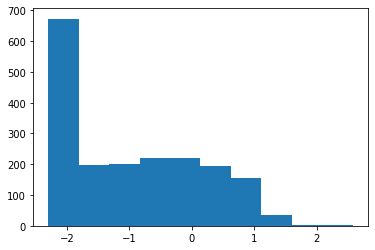

In [48]:
fix, ax = plt.subplots(1)
ax.hist(df_assay['pIC50'])

This isn't normally distrbibuted - therefore, could 'class_weight='balanced' - or, could use tree-based models that perform well on imbalanced datsets as their hierarchcial strucutre alllows them to learn signals from both classses